In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/MPP_Dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier , AdaBoostClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.metrics import log_loss
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv("/content/MPP_Dataset/Train.csv")
test=pd.read_csv("/content/MPP_Dataset/Test.csv")
submission=pd.read_csv("/content/MPP_Dataset/sample_submission.csv")

In [ ]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
#train.drop(['Category_2'],axis=1,inplace=True)

In [ ]:
train.shape

(18208, 11)

In [ ]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [ ]:

#test.drop(['Category_2'],axis=1,inplace=True)

In [ ]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [ ]:
submission.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
train.isna().sum()/train.shape[0]*100

Store_Ratio       0.0
Basket_Ratio      0.0
Store_Score       0.0
Store_Presence    0.0
Score_1           0.0
Score_2           0.0
Score_3           0.0
Score_4           0.0
time              0.0
popularity        0.0
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
col_ls = ['Store_Ratio','Basket_Ratio','Category_1','Store_Score','Category_2','Store_Presence','Score_1','Score_2','Score_3','Score_4','time']

In [ ]:

data[col_ls] = scaler.fit_transform(data[col_ls])

In [ ]:
train1 = data[ data['is_train'] == 1]
test1 = data[ data['is_train'] == 0]

In [ ]:
train1.drop(['is_train'], inplace=True, axis=1)
test1.drop(['is_train'], inplace=True, axis=1)
test1.drop(['popularity'], inplace=True, axis=1)

In [ ]:
train1 = train1[ [col for col in train1 if col!='popularity'] + ['popularity']]

In [ ]:
X_train = train1.iloc[:,:-1]
y_train = train1.iloc[:,-1]
X_test = test1

In [ ]:
X_train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,-0.679737,-1.597322,-0.889430,-2.843376,0.739825,1.358726,1.503121,-0.483481,-1.146339,-0.049903,-0.305674
1,-1.537591,-1.261883,-1.455606,-0.927775,0.739825,1.232212,1.396805,-0.263947,-1.410943,-1.243088,-0.334350
2,0.614482,0.796494,1.092185,0.555224,0.739825,-1.153885,-0.777855,-0.227601,0.117716,0.272818,-0.492115
3,-1.785526,-1.591322,-0.323255,-2.662616,0.739825,0.981821,1.471710,-0.394795,-1.315494,-1.157201,-0.361940
4,-1.552467,-1.175703,0.242921,-1.282343,0.739825,1.213762,-0.777855,-0.409334,-1.302227,-0.188054,-0.334416


In [ ]:
X_train.shape

(18208, 11)

In [ ]:
y_train.head()

0    4
1    4
2    4
3    5
4    3
Name: popularity, dtype: object

In [ ]:
X_test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,-1.884700,1.684811,-1.172518,-1.387347,-1.351671,-0.929060,1.616687,4.533800,-1.551685,0.384805,0.213743
1,0.207869,0.498178,-0.323255,0.531491,0.739825,-1.250404,0.000190,-0.423872,-0.243443,0.662153,0.402523
2,-0.431803,0.852842,-1.455606,0.545755,0.739825,-0.191064,-0.755360,0.259443,0.983759,1.251617,-0.014253
3,-0.600398,0.869415,-0.040167,0.277132,0.739825,-1.176815,-0.243855,0.026825,0.025583,-0.682835,1.188263
4,1.278947,0.895932,-0.889430,0.162179,-1.351671,-1.033697,-0.759371,-0.822958,1.997215,0.515398,0.783069


In [ ]:
X_test.shape

(12140, 11)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
submit = pd.DataFrame() 

In [ ]:
submit.insert(0, "0",y_pred, True) 

In [ ]:
submit.insert(1, "1",y_pred, True)

In [ ]:
submit.insert(2, "2", y_pred, True)

In [ ]:
submit.insert(3, "3", y_pred, True)

In [ ]:
submit.insert(4, "4", y_pred, True)

In [ ]:
submit

,0,1,2,3,4
0,3.465590,3.465590,3.465590,3.465590,3.465590
1,3.963696,3.963696,3.963696,3.963696,3.963696
2,3.925851,3.925851,3.925851,3.925851,3.925851
3,3.911881,3.911881,3.911881,3.911881,3.911881
4,3.980546,3.980546,3.980546,3.980546,3.980546
...,...,...,...,...,...
12135,3.582961,3.582961,3.582961,3.582961,3.582961
12136,3.981888,3.981888,3.981888,3.981888,3.981888
12137,3.967888,3.967888,3.967888,3.967888,3.967888
12138,3.951696,3.951696,3.951696,3.951696,3.951696


In [ ]:

submit.to_csv("submit.csv",index=None)
submit

,0,1,2,3,4


In [ ]:
# Separating dependent-independent variables
X = df1.drop('popularity',axis=1)
y = df1['popularity']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X = pd.DataFrame(X_,columns=X.columns)


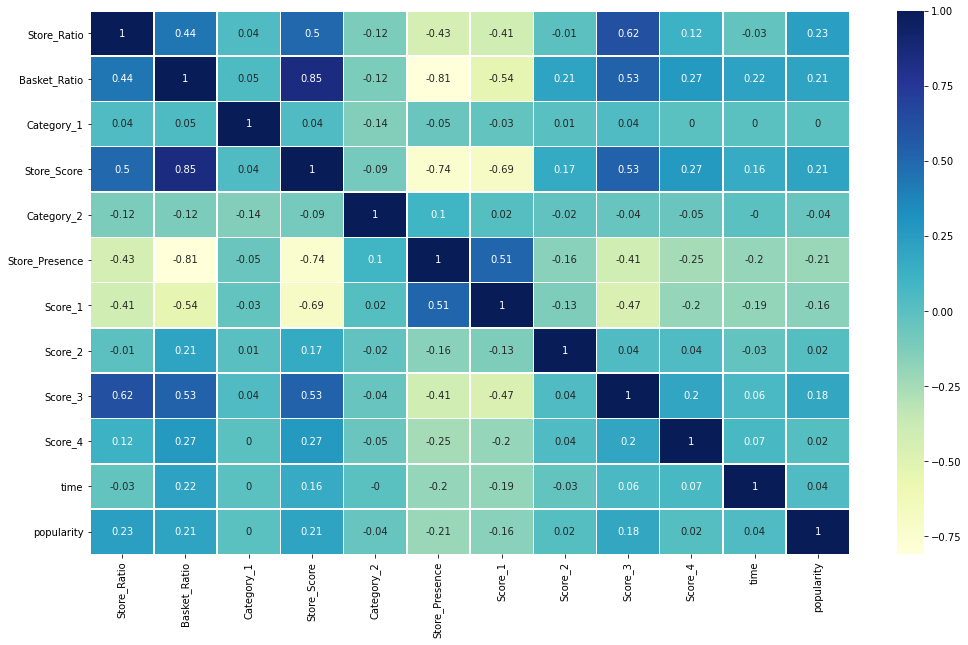

In [ ]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train,y_train= make_classification(n_samples=1000, n_features=11,
                         n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pre_cl=clf.predict(X_test)

In [ ]:
Y_pre_prb=clf.predict(X_test)

In [ ]:
 Y_pre_prb=(np.array(Y_pre_prb))

In [ ]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt.score(X_train, y_train))

# predict the target on the train dataset
y_dt = model_dt.predict(X_test)

from sklearn.metrics import confusion_matrix
#cm1 = confusion_matrix(X_test, y_dt)
print('-------The confusion matrix for this model is-------')
#print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
#print(classification_report(X_test, y_dt))

Depth of the Decision Tree:  10
Accuracy on training:  1.0
-------The confusion matrix for this model is-------


-------Printing the whole report of the model-------


In [ ]:
submit = pd.DataFrame() 

In [ ]:
submit.insert(0, "0",y_dt, True)

In [ ]:
submit.insert(1, "1",y_dt, True)

In [ ]:
submit.insert(2, "2",y_dt, True)

In [ ]:
submit.insert(3, "3",y_dt, True)

In [ ]:
submit.insert(4, "4",y_dt, True)

In [ ]:
submit

,0,1,2,3,4
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
12135,0,0,0,0,0
12136,1,1,1,1,1
12137,1,1,1,1,1
12138,1,1,1,1,1


In [ ]:
submit.nunique().sum()

10

In [ ]:

submit.to_csv("submit_dt.csv",index=None)
submit

,0,1,2,3,4
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
12135,0,0,0,0,0
12136,1,1,1,1,1
12137,1,1,1,1,1
12138,1,1,1,1,1


In [ ]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'pop':train_dt1_y})

In [ ]:

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X1, y1)

print(gridsearch.best_params_)

{'max_depth': 30, 'max_features': 0.3}


In [ ]:

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt1, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X1, y1)

print(randomsearch.best_params_)

{'max_features': 0.3, 'max_depth': 30}


In [ ]:
# final model
model_dt1 = DecisionTreeClassifier(max_depth=30, max_features=0.3 ,random_state=10)

# fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# Training score
print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))

0.9992


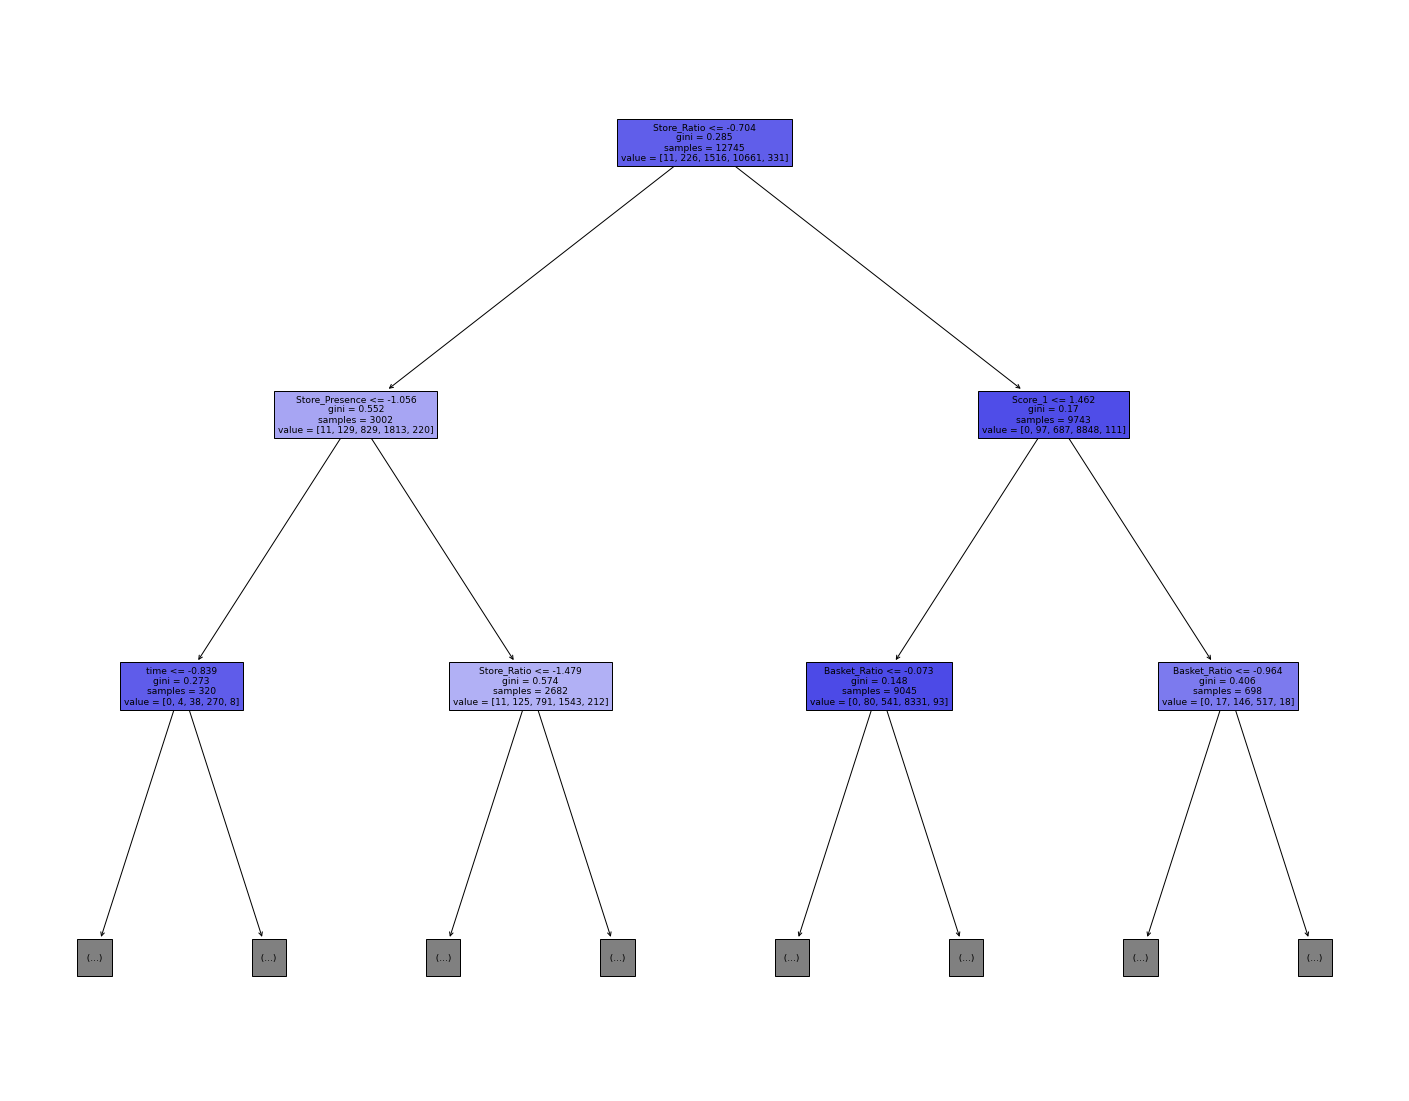

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

**Skip Above models **

**Logistic Regression**

In [ ]:
X = train.drop('popularity',axis=1)
Y = train['popularity']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X = pd.DataFrame(X_,columns=X.columns)

folds = StratifiedKFold(n_splits=5,shuffle=True ,random_state=42)

oof_preds = []
oof_scores = []

for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  model = LogisticRegression(max_iter=5000)
  model.fit(*train_set)

  preds = model.predict_proba(test_set[0])
  score = log_loss(test_set[1],preds)
  
  oof_pred_fold = model.predict_proba(scaler.transform(test))
  oof_preds.append(oof_pred_fold)

  print(score)
  oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)




0.4907592085350743
0.4798785997164028
0.47593312360446516
0.483284000150208
0.47196863615997237
Mean OOF Score : 0.48036471363322447


Feature: 0, Score: -1.04284
Feature: 1, Score: -0.35004
Feature: 2, Score: 0.12946
Feature: 3, Score: -0.17020
Feature: 4, Score: 0.01232
Feature: 5, Score: 0.07705
Feature: 6, Score: -0.32319
Feature: 7, Score: -2.53692
Feature: 8, Score: -0.64695


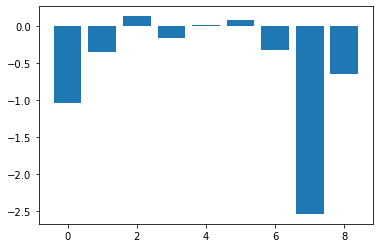

In [ ]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submission.csv",index=None)
submission

In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  model_xg = DecisionTreeClassifier(random_state=10,criterion='gini')
  model_xg.fit(*train_set)

  preds = model_xg.predict_proba(test_set[0])
  score = log_loss(test_set[1],preds)
  
  oof_pred_fold = model_xg.predict_proba(scaler.transform(test))
  oof_preds.append(oof_pred_fold)

  print(score)
  oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

6.059933584939029
6.48668947120234
6.467722542923971
6.3936103515984115
6.497957108078504
Mean OOF Score : 3.430773662690838


In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  model_ET = ExtraTreesClassifier(n_estimators=500, criterion='entropy', max_depth=None, max_features=None)
  model_ET.fit(*train_set)

  preds = model_ET.predict_proba(test_set[0])
  score = log_loss(test_set[1],preds)
  
  oof_pred_fold = model_ET.predict_proba(scaler.transform(test))
  oof_preds.append(oof_pred_fold)

  print(score)
  oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

0.41048988912449164
0.3984306317457895
0.39423624239819755
0.37174822328309487
0.35179718047631664
Mean OOF Score : 2.415629252929085


In [ ]:
print(model_ET.feature_importances_)

[0.16121043 0.11877841 0.0782939  0.0962232  0.03040554 0.1064221
 0.06981626 0.06755505 0.08830553 0.10427209 0.07871749]


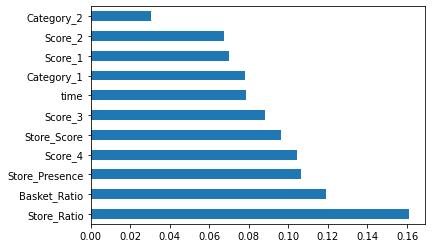

In [ ]:
feat_importances = pd.Series(model_ET.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Gradient Boosting Classifier

In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  model_xg = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=400,  criterion='friedman_mse', verbose=0)
  model_xg.fit(*train_set)

  preds = model_xg.predict_proba(test_set[0])
  score = log_loss(test_set[1],preds)
  
  oof_pred_fold = model_xg.predict_proba(scaler.transform(test))
  oof_preds.append(oof_pred_fold)

  print(score)
  oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

0.46911066331881646
0.4639289309552999
0.4600472140066761
0.46713393732606306
0.45213786715560444
Mean OOF Score : 1.9273398703349365


**Adaboost Classifier this is model that gives me a chance to score the $57$ in leaderBoard**

In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  
bdt_real1 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=12),
    n_estimators=600,
    learning_rate=1)
bdt_real1.fit(*train_set)

preds =  bdt_real1.predict_proba(test_set[0])
score = log_loss(test_set[1],preds)
  
oof_pred_fold =  bdt_real1.predict_proba(scaler.transform(test))
oof_preds.append(oof_pred_fold)

print(score)
oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

0.842526703341975
Mean OOF Score : 1.8756821004781288


In [ ]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submission.csv",index=None)
submission

,0,1,2,3,4
0,0.000058,0.023081,0.712028,0.219379,0.045454
1,0.000027,0.005780,0.029593,0.955212,0.009388
2,0.000030,0.005585,0.057115,0.920739,0.016531
3,0.000031,0.007032,0.046990,0.909271,0.036675
4,0.000024,0.000796,0.005467,0.992319,0.001394
...,...,...,...,...,...
12135,0.000098,0.017534,0.113969,0.848526,0.019873
12136,0.000023,0.000905,0.008468,0.988782,0.001821
12137,0.000027,0.003209,0.038180,0.955832,0.002752
12138,0.000027,0.001215,0.008432,0.988666,0.001661


**LGBM classifier**

In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  
lgbmmodel=LGBMClassifier(boosting_type='gbdt',learning_rate=0.05, n_estimators=900)
lgbmmodel.fit(*train_set)

preds =  lgbmmodel.predict_proba(test_set[0])
score = log_loss(test_set[1],preds)
  
oof_pred_fold = lgbmmodel.predict_proba(scaler.transform(test))
oof_preds.append(oof_pred_fold)

print(score)
oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)



0.4590175086932425
Mean OOF Score : 0.6002094945052933


In [ ]:
print(lgbmmodel.feature_importances_)

[14207 12803  7284 12353  1189 12634 12176 13326 13245 16722 15293]


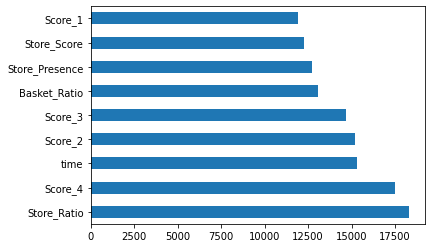

In [ ]:
feat_importances = pd.Series(lgbmmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

**Adaboost Classifier**

In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  
bdt_dis =AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10),
    n_estimators=800,
    learning_rate=1.5,
    algorithm="SAMME")
bdt_dis.fit(*train_set)

preds =  bdt_dis.predict_proba(test_set[0])
score = log_loss(test_set[1],preds)
  
oof_pred_fold =  bdt_dis.predict_proba(scaler.transform(test))
oof_preds.append(oof_pred_fold)

print(score)
oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

1.536106314753326
Mean OOF Score : 0.5800881433443814


In [ ]:
for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=14),
    n_estimators=800,
    learning_rate=1)
bdt_real.fit(*train_set)

preds =  bdt_real.predict_proba(test_set[0])
score = log_loss(test_set[1],preds)
  
oof_pred_fold =  bdt_real.predict_proba(scaler.transform(test))
oof_preds.append(oof_pred_fold)

print(score)
oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

1.0105575111092184
Mean OOF Score : 0.5687301798792235


**Important Features**

In [ ]:
print(bdt_real.feature_importances_)

[0.12276515 0.10371749 0.07994655 0.10579022 0.10868938 0.10623782
 0.11459778 0.12310449 0.13515112]


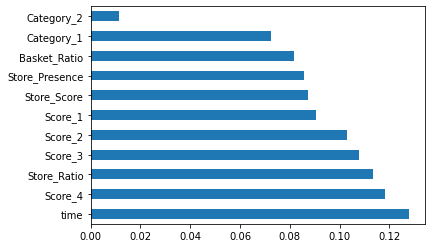

In [ ]:
feat_importances = pd.Series(bdt_real.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
submission = pd.DataFrame(final_preds)
submission.to_csv("bdt_real1.csv",index=None)
submission

,0,1,2,3,4
0,2.752418e-06,0.039228,0.260549,0.630611,0.069610
1,8.592354e-09,0.004359,0.037656,0.950865,0.007120
2,3.498864e-09,0.006648,0.074184,0.906666,0.012502
3,9.119866e-07,0.006119,0.039180,0.944394,0.010305
4,4.063249e-10,0.000688,0.011868,0.985263,0.002182
...,...,...,...,...,...
12135,3.471420e-04,0.051035,0.249102,0.623430,0.076086
12136,4.279766e-08,0.001454,0.011216,0.985654,0.001677
12137,1.791225e-08,0.003407,0.026971,0.963178,0.006444
12138,2.620973e-07,0.003447,0.025098,0.968138,0.003317
